In [1]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules related to this exercise
import tools 
from model_dc_multidim import model_dc_multidim
import time

Now consider the model extended with permanet income: 
$$\begin{eqnarray*}
v_{t}(m_{t},p_t,z_t,\varepsilon_t^0,\varepsilon_t^1) & = & \max_{z_{t+1}\in \mathcal{Z}(z_t)}\left\{\mathcal{V}_t(m_t,z_{t+1})+\sigma_{\varepsilon}\varepsilon_t^{L_{t+1}}\right\} \\
\mathcal{Z}(z_t) &= &\begin{cases}
\{0,1\} & \text{if} & z_t=0 \\
\{1\} & \text{if} & z_t = 1
\end{cases}
\end{eqnarray*}$$
and the *choice-specific value functions* are given by
$$\begin{eqnarray*}
 \mathcal{V}_t(m_t,p_t,z_{t+1}) & = & \max_{c_t} \frac{C_{t}^{1-\rho}}{1-\rho}-\alpha \mathbb{1}_{z_{t+1}=0} +\beta\mathbb{E}_{t}\left[v_{t+1}(\bullet_{t+1})\right] \\
  & \text{s.t.}\\
p_{t+1} & = &  \begin{cases}
p_t & \text{if} & z_{t+1}=1 \\
\xi_{t+1}p_t & \text{if} & z_{t+1} = 0
\end{cases}  \\
m_{t+1} & = & R(m_{t}-c_{t})+W \mathbb{1}_{z_{t+1}=0} p_{t+1}+ \kappa \mathbb{1}_{z_{t+1}=1} p_{t+1}\\
c_t & \leq & m_t\\
\log(\xi_{t+1}) & \sim & \mathcal{N}(-0.5 \sigma_{\xi}^{2} ,\sigma_{\xi}^{2})\\
\varepsilon_{t+1}^0,\varepsilon_{t+1}^1 & \sim & \text{Extreme Value Type 1}
\end{eqnarray*}$$

#### 5. Solve the extended model [THIS IS NOT EASY]
Hint: You have an extra state variable, and you therefore have to make an outer loop for both z and p.

In [2]:
t0 = time.time()  # set the starting time
model = model_dc_multidim()
model.setup()
model.create_grids()
model.solve()
t1 = time.time() # set the ending time
print(f'time: {t1-t0:.8} seconds') # print the total time

time: 25.50513 seconds


In [17]:
par = model.par
sol = model.sol

par.grid_m,sol.c[1-1,0,:,50]

(array([1.00000000e-06, 2.04091224e-02, 4.08172449e-02, 6.12253673e-02,
        8.16334898e-02, 1.02041612e-01, 1.22449735e-01, 1.42857857e-01,
        1.63265980e-01, 1.83674102e-01, 2.04082224e-01, 2.24490347e-01,
        2.44898469e-01, 2.65306592e-01, 2.85714714e-01, 3.06122837e-01,
        3.26530959e-01, 3.46939082e-01, 3.67347204e-01, 3.87755327e-01,
        4.08163449e-01, 4.28571571e-01, 4.48979694e-01, 4.69387816e-01,
        4.89795939e-01, 5.10204061e-01, 5.30612184e-01, 5.51020306e-01,
        5.71428429e-01, 5.91836551e-01, 6.12244673e-01, 6.32652796e-01,
        6.53060918e-01, 6.73469041e-01, 6.93877163e-01, 7.14285286e-01,
        7.34693408e-01, 7.55101531e-01, 7.75509653e-01, 7.95917776e-01,
        8.16325898e-01, 8.36734020e-01, 8.57142143e-01, 8.77550265e-01,
        8.97958388e-01, 9.18366510e-01, 9.38774633e-01, 9.59182755e-01,
        9.79590878e-01, 9.99999000e-01, 1.00000100e+00, 1.05741843e+00,
        1.11511025e+00, 1.17308023e+00, 1.23133222e+00, 1.289870

Retire in t+1
p=0.505


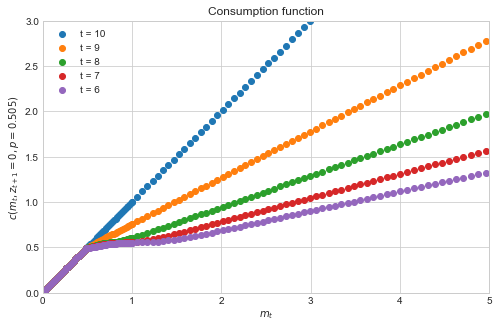

Working in t+1
p=1.01


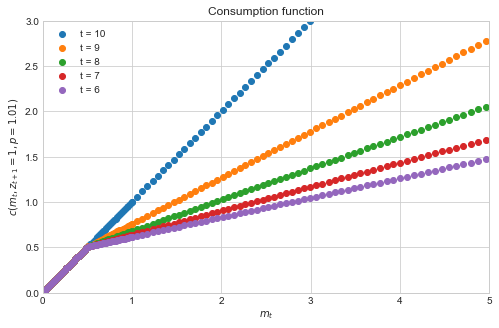

Working in t+1
p=1.52


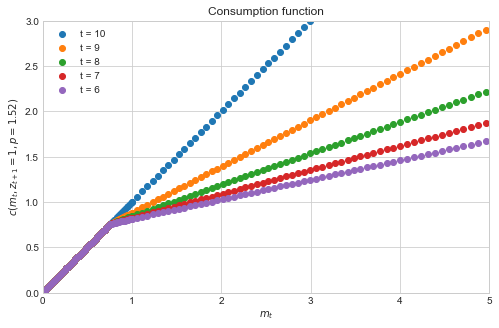

In [18]:
# Figure
def figure_multi_dim(par,sol,z,i_p):
    p = par.grid_p[i_p]
    if z == 0:
        print(f'Retire in t+1')
        ts = [par.T, par.T-1, par.T-2, par.T-3, par.T-4]
        print(f'p={p:.3}')
    elif z ==1:
        print(f'Working in t+1')
        print(f'p={p:.3}')
        ts = [par.T, par.T-1, par.T-2, par.T-3, par.T-4]
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    for i in ts:
        ax.scatter(par.grid_m,sol.c[i-1,z,:,i_p], label=f't = {i}')
    ax.set_xlabel(f"$m_t$")
    ax.set_ylabel(f"$c(m_t,z_{{t+1}} = {z}, p = {p:.3})$")
    ax.set_xlim([0, 5])
    ax.set_ylim([0,3])
    ax.set_title(f'Consumption function')
    plt.legend()
    plt.show()

figure_multi_dim(model.par,model.sol,0,25)
figure_multi_dim(model.par,model.sol,1,50)
figure_multi_dim(model.par,model.sol,1,75)